# The standard Evolutionary Algorithm (EA)

Initialise the entire population
**repeat**
    > Select promising individuals from current population
    > Reproduce selected individuals
    > Mutate reproduced individuals
    > Evaluate created individuals
    > Create new/updated population
**until** time-runs-out
**return** best from population

In [1]:
import copy
import math
from ipycanvas import Canvas

In [2]:
def get_ready(task_set, cycle, ready_list):
    for task in task_set:
        if cycle % task.period == 0:
            new_job = copy.deepcopy(task)
            new_job.deadline = new_job.deadline + cycle
            new_job.release_time = cycle
            ready_list.append(new_job)

    # sort on deadline
    # https://www.geeksforgeeks.org/sorting-objects-of-user-defined-class-in-python/
    ready_list = sorted(ready_list, key=lambda t: t.deadline)

    return sorted(ready_list, key=lambda t: t.deadline)

def edf(ts):
    T = math.lcm(2000,3000,4000) # least common multiple of TT task periods. 2000 mt =
    S = [] # schedule will be hyperperiod long. 12 000 microticks == 120 000 microsecs == 120 ms
    ready_list = []
    wcrts = {} # worst case response times

    for t in range(0, T):
        ready_list = get_ready(ts, t, ready_list)

        for task in ready_list:
            if task.duration > 0 and task.deadline <= t:
                return []

            # job done check response time gt wcrt and remove from ready list
            if task.duration == 0 and task.deadline >= t:
                response_time = t - task.release_time

                if task.name not in wcrts or response_time >= wcrts[task.name]:
                    wcrts[task.name] = response_time

                ready_list.remove(task)


        if ready_list == []:
            S.append("IDLE")
            continue
        else:
            # EDF get next job to execute
            S.append(ready_list[0].name)
            ready_list[0].duration = ready_list[0].duration - 1

    if ready_list != []:
        return [], []

    return S, wcrts

In [3]:
from caseLoader import CaseLoader
from taskType import TaskType

loader = CaseLoader()
cases = loader.load_test_case("inf_30_30", 0, filePath="../test_cases/")
cases = [c for c in cases if c.type == TaskType.TIME]

Searching for test cases at:
../test_cases/inf_30_30
Loaded case_group: inf_30_30 - case: 0 test case(s).


In [4]:
s, wcrts = edf(cases)
print(s)

['tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT0', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT1', 'tTT4', 'tTT4', 'tTT4', 'tTT4', 'tTT4', 'tTT4', 'tTT5', 'tTT5', 'tTT5', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT6', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT11', 'tTT14', 'tTT14', 'tTT14', 'tTT14', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT18', 'tTT21', 'tTT21', 'tTT21', 'tTT21', 'tTT21', 

In [5]:
def get_bounds(s):
    curr_task = ""
    start_point = -1
    end_point = -1
    bounds = []
    max_end = 0

    for idx, x in enumerate(s):
        if x != curr_task:
            prev_task = curr_task
            curr_task = x

            if start_point == -1:
                start_point = idx
            elif end_point == -1:
                end_point = idx
            else:
                time = end_point - start_point
                bounds.append((prev_task, (start_point, end_point), time))

                if end_point > max_end:
                    max_end = end_point

                start_point = -1
                end_point = -1


    return [c for c in bounds if c[0] != "IDLE"], max_end

get_bounds(s)



([('tTT1', (0, 16), 16),
  ('tTT6', (39, 42), 3),
  ('tTT18', (81, 85), 4),
  ('tTT26', (125, 156), 31),
  ('tTT8', (171, 210), 39),
  ('tTT17', (286, 322), 36),
  ('tTT23', (439, 444), 5),
  ('tTT2', (594, 674), 80),
  ('tTT13', (704, 835), 131),
  ('tTT22', (859, 874), 15),
  ('tTT0', (884, 2000), 1116),
  ('tTT5', (2033, 2039), 6),
  ('tTT14', (2063, 2081), 18),
  ('tTT24', (2113, 2125), 12),
  ('tTT9', (3039, 3064), 25),
  ('tTT19', (3151, 3209), 58),
  ('tTT25', (3273, 3421), 148),
  ('tTT0', (3503, 4000), 497),
  ('tTT5', (4033, 4039), 6),
  ('tTT14', (4063, 4081), 18),
  ('tTT24', (4113, 4125), 12),
  ('tTT2', (4162, 4171), 9),
  ('tTT13', (4201, 4332), 131),
  ('tTT22', (4356, 4371), 15),
  ('tTT0', (4381, 6000), 1619),
  ('tTT5', (6033, 6039), 6),
  ('tTT14', (6063, 6081), 18),
  ('tTT24', (6113, 6125), 12),
  ('tTT7', (6162, 6171), 9),
  ('tTT10', (6235, 6286), 51),
  ('tTT20', (6380, 6439), 59),
  ('tTT28', (6592, 6594), 2),
  ('tTT1', (8000, 8016), 16),
  ('tTT6', (8039, 80

In [6]:
import numpy as np

from ipycanvas import Canvas

n_particles = 100_000

x = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
y = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
size = np.random.randint(1, 3, n_particles)

canvas = Canvas(width=200, height=200)

canvas.fill_style = "green"
canvas.fill_rects(x, y, size)

canvas

Canvas(height=200, width=200)

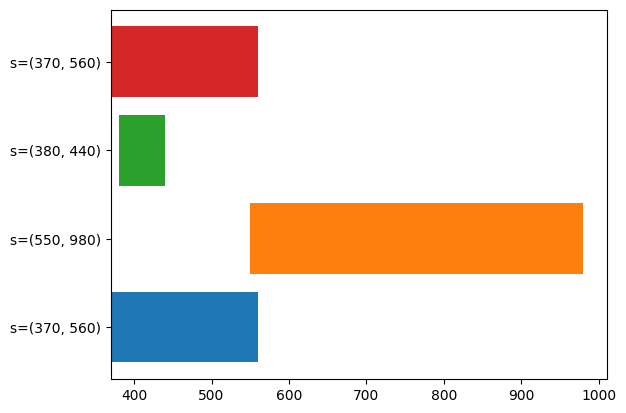

In [7]:
from sortedcontainers import SortedSet
from matplotlib import pyplot as plt

def draw_schedule():

    servers = SortedSet([c for c in s if c.__contains__("TT")])

    def y_cor(server_name: str):
        index = servers.index(server_name)
        return (index + 1) * 70

    def x_cor(server_name: str):
        return servers.index(server_name)


    x = [(370, 560), (550,980), (380,440), (370, 560)]


    # for k in s:
    #     if(k == "IDLE"):
    #         continue
    #     x.append((10, 10))


    fig, ax = plt.subplots()
    for i,evt in enumerate(x):
        ax.barh(i,width=evt[1]-evt[0],left=evt[0])

    ax.set_yticks(range(len(x)))
    ax.set_yticklabels([f's={i}' for i in x])

    fig.canvas.draw()
    plt.show()

draw_schedule()

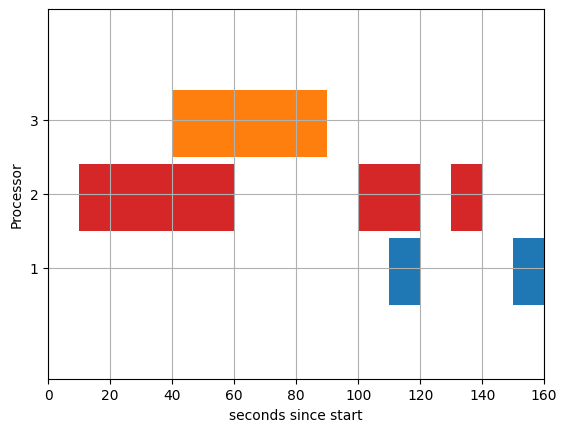

In [8]:

# Importing the matplotlib.pyplot
import matplotlib.pyplot as plt

# Declaring a figure "gnt"
fig, gnt = plt.subplots()

# Setting Y-axis limits
gnt.set_ylim(0, 50)

# Setting X-axis limits
gnt.set_xlim(0, 160)

# Setting labels for x-axis and y-axis
gnt.set_xlabel('seconds since start')
gnt.set_ylabel('Processor')

# Setting ticks on y-axis
gnt.set_yticks([15, 25, 35])
# Labelling tickes of y-axis
gnt.set_yticklabels(['1', '2', '3'])

# Setting graph attribute
gnt.grid(True)

# Declaring a bar in schedule
gnt.broken_barh([(40, 50)], (30, 9), facecolors =('tab:orange'))

# Declaring multiple bars in at same level and same width
gnt.broken_barh([(110, 10), (150, 10)], (10, 9),
                         facecolors ='tab:blue')

gnt.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
                                  facecolors =('tab:red'))

plt.savefig("gantt1.png")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[('tTT0', (884, 2000), 1116), ('tTT0', (3503, 4000), 497), ('tTT0', (4381, 6000), 1619)]
[('tTT1', (0, 16), 16), ('tTT1', (8000, 8016), 16)]
[('tTT10', (6235, 6286), 51)]
[('tTT11', (10042, 10063), 21)]
[]
[('tTT13', (704, 835), 131), ('tTT13', (4201, 4332), 131)]
[('tTT14', (2063, 2081), 18), ('tTT14', (4063, 4081), 18), ('tTT14', (6063, 6081), 18)]
[('tTT15', (8332, 8339), 7)]
[]
[('tTT17', (286, 322), 36), ('tTT17', (9115, 9151), 36)]
[('tTT18', (81, 85), 4), ('tTT18', (8081, 8085), 4)]
[('tTT19', (3151, 3209), 58)]
[('tTT2', (594, 674), 80), ('tTT2', (4162, 4171), 9)]
[('tTT20', (6380, 6439), 59)]
[('tTT21', (10085, 10113), 28)]
[('tTT22', (859, 874), 15), ('tTT22', (4356, 4371), 15)]
[('tTT23', (439, 444), 5), ('tTT23', (9268, 9273), 5)]
[('tTT24', (2113, 2125), 12), ('tTT24', (4113, 4125), 12), ('tTT24', (6113, 6125), 12)]
[('tTT25', (3273, 3421), 148)]
[('tTT26', (125, 156), 31), ('tTT26', (8125, 815

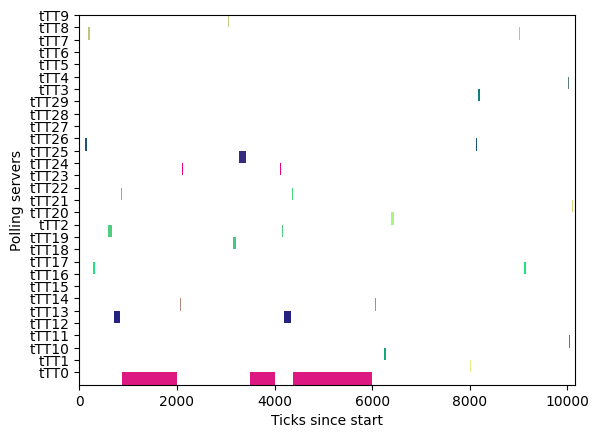

In [9]:

import random
# Importing the matplotlib.pyplot
import matplotlib.pyplot as plt

servers = SortedSet([c for c in s if c.__contains__("TT")])
data, max_end = get_bounds(s)

#print(len(servers), data, max_end)

# Declaring a figure "gnt"
fig, gnt = plt.subplots()

# Setting Y-axis limits
gnt.set_ylim(0, len(servers))

# Setting X-axis limits
gnt.set_xlim(0, max_end)

# Setting labels for x-axis and y-axis
gnt.set_xlabel('Ticks since start')
gnt.set_ylabel('Polling servers')

# Setting ticks on y-axis
def y_ticks(s):
    list = []
    dic = {}

    for idx, x in enumerate(s):
        print(idx)
        placement = (idx + 1) * 70
        list.append(placement)
        dic[x] = placement

    return list, dic

y, dic = y_ticks(servers)

gnt.set_yticks(y)
# Labelling tickes of y-axis
gnt.set_yticklabels(servers)

# Setting graph attribute
gnt.grid(False)

height_of_jobs = 70

# iterate servers
for s in servers:
    exeutions = [c for c in data if c[0] == s]
    print(exeutions)
    to_print = []
    for e in exeutions:
        job_dif = (e[1][0], e[2])
        to_print.append(job_dif)

    gnt.broken_barh(to_print, (dic[s] - height_of_jobs, height_of_jobs), facecolors =(random.uniform(0, 1), random.uniform(0, 1), 0.5))



# Declaring a bar in schedule
#gnt.broken_barh([(80, 1500)], (dic["tTT26"] - 20, height_of_jobs), facecolors =('tab:orange'))

# Declaring multiple bars in at same level and same width
#gnt.broken_barh([(110, 10), (150, 10)], (10, 9),
#                         facecolors ='tab:blue')

#gnt.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
#                                  facecolors =('tab:red'))

plt.savefig("gantt1.png")

NameError: name 's' is not defined

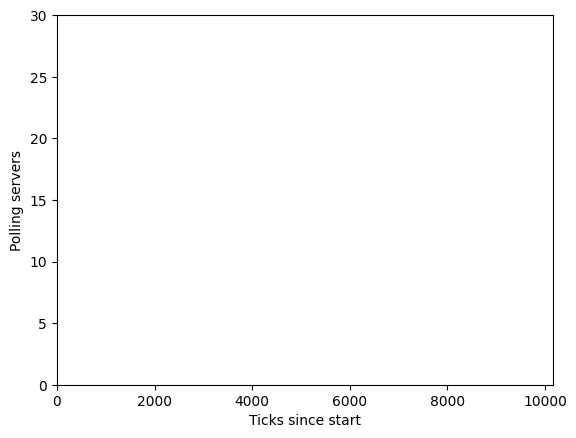

In [10]:
from visualization.scheduling_visualizer import SchedulingVisualizer


viz = SchedulingVisualizer()

sol, wcrts = edf(cases)

viz.draw_plot(sol, "first")